<a href="https://colab.research.google.com/github/balajibetadur/Friendship-goals-Hackerearth-/blob/main/Friendship_goals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 32
#IPython kernel of Jupyter notebook is able to display plots of code in input cells. The inline option with the %matplotlib magic function renders the plot out cell even if show() function of plot object is not called. ...

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs = 32

Data set link : https://www.kaggle.com/c/dogs-vs-cats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import zipfile

# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Dhaneshwar/data_friendship_goals.zip", 'r')
# zip_ref.extractall("/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Dhaneshwar/")
# zip_ref.close()

In [ ]:
# Enter the path to the folder folder hierarchy
# folder hierarchy is
# PetImages
# \Train
# \\Cat
# \\Dog
# \Test
# \\Cat
# \\Dog
# path = "/home/daneshwar/Desktop/fastai_new_folder/hackerearth/data"
# path = '/content/drive/My Drive/Hacker Earth/Friendship Goals/DATA'
path = '/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Dhaneshwar/DATA'


In [ ]:
path

'/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Dhaneshwar/DATA'

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [ ]:
data

ImageDataBunch;

Train: LabelList (1084 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Adults,Adults,Adults,Adults,Adults
Path: /content/drive/My Drive/Hacker Earth/Friendship Goals/data/Dhaneshwar/DATA;

Valid: LabelList (270 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Teenagers,Toddler,Teenagers,Teenagers,Teenagers
Path: /content/drive/My Drive/Hacker Earth/Friendship Goals/data/Dhaneshwar/DATA;

Test: None

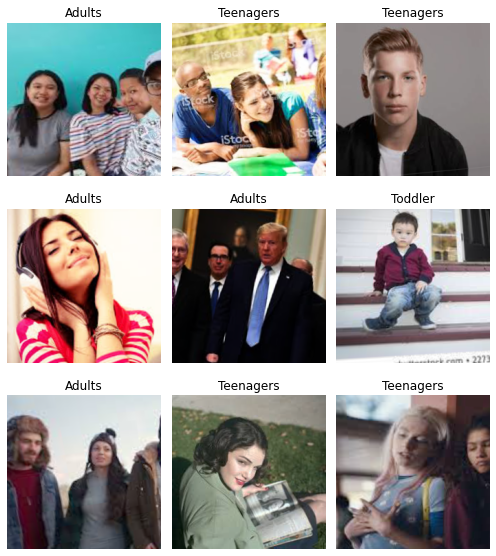

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))


In [ ]:
print(data.classes)
len(data.classes),data.c

['Adults', 'Teenagers', 'Toddler']


(3, 3)

In [ ]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.413034,0.916856,0.744444,02:29
1,1.125457,0.905375,0.703704,00:22
2,0.870039,0.835192,0.733333,00:21
3,0.693697,0.793846,0.725926,00:20


In [ ]:
learn.save('/content/drive/My Drive/Hacker Earth/Friendship Goals/Models/resnet101-stage-1a')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

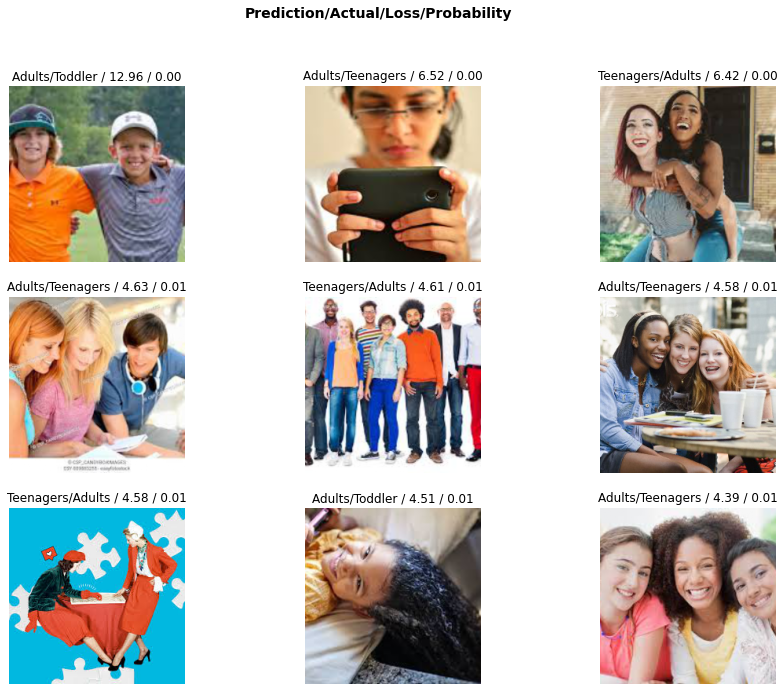

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
#doc(interp.plot_top_losses)

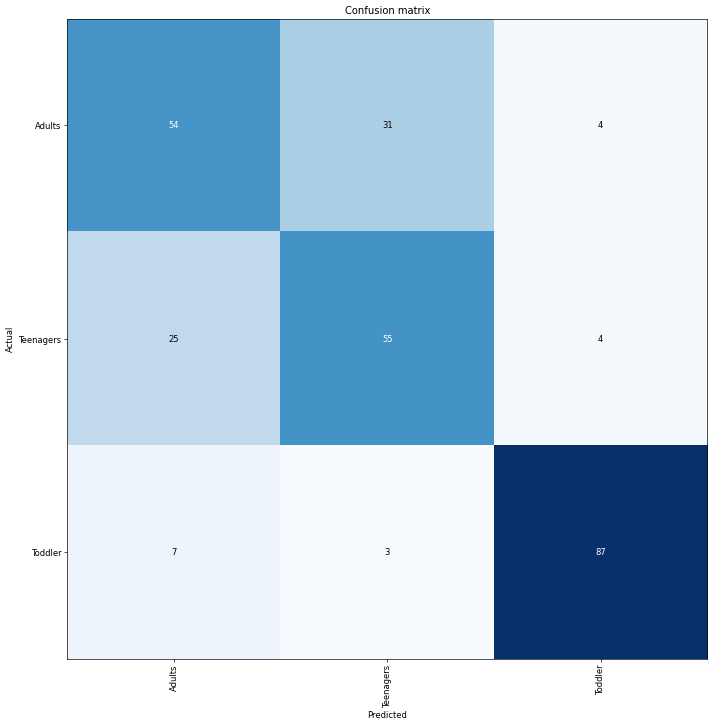

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('Adults', 'Teenagers', 31),
 ('Teenagers', 'Adults', 25),
 ('Toddler', 'Adults', 7),
 ('Adults', 'Toddler', 4),
 ('Teenagers', 'Toddler', 4),
 ('Toddler', 'Teenagers', 3)]

#WAIT..

In [ ]:
len(data.valid_ds)

270

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.765525,1.240767,0.707407,00:20


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.523585,0.668828,0.748148,00:20
1,0.436960,0.704609,0.774074,00:20
2,0.337730,0.487551,0.811111,00:20
3,0.267835,0.476909,0.837037,00:21


In [ ]:
learn.save('/content/drive/My Drive/Hacker Earth/Friendship Goals/Models/resnet101-stage-2a')

In [ ]:
#learn.load('stage-1')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


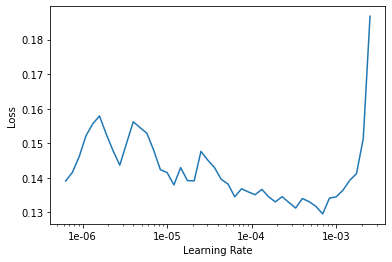

In [ ]:
learn.recorder.plot()

In [ ]:
#learn.load('stage-3')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.212507,1.784131,0.663300,00:29
1,0.496281,1.569912,0.595960,00:28
2,0.487914,0.776685,0.764310,00:28
3,0.419592,0.695381,0.754209,00:28


In [ ]:
learn.save('/content/drive/My Drive/Hacker Earth/Friendship Goals/Models/resnet101-stage-3')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


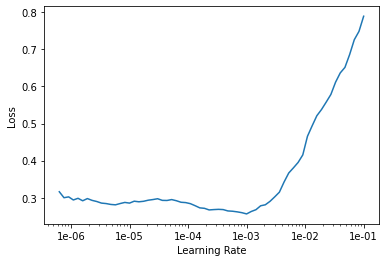

In [ ]:
learn.recorder.plot()

### only for resnet101 based on curve

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3))

In [ ]:
learn.save('/content/drive/My Drive/Hacker Earth/Friendship Goals/Models/resnet101-stage-4')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn = cnn_learner(data, models.resnet101).load('/content/drive/My Drive/Hacker Earth/Friendship Goals/Models/resnet101-stage-4')

In [ ]:
learn.export()

In [ ]:
learn = load_learner("/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Dhaneshwar/DATA")

In [ ]:
#enter the image path 



image_path="/content/drive/My Drive/Hacker Earth/Friendship Goals/Test Images/photo-1567822781105-a80d1b601697.png"
cat, tensor, probs = learn.predict(open_image(image_path))
print(cat)
print(tensor)
print(probs)

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Test_H/Dataset/Test Data.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Test_H/Dataset/")
zip_ref.close()

In [ ]:
import cv2
import glob
ids=[]
predictions=[]
test_data = '/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Test_H/Dataset/Test Data/'
for img in glob.glob(test_data + "*.jpg"):
    #print(img)
    a=img.strip(test_data)
    print(a)
    cat, tensor, probs = learn.predict(open_image(img))
    print(cat.__str__())
    ids.append(a)
    
    predictions.append(cat.__str__())
    



In [ ]:
print(ids)
print(predictions)

In [ ]:
import pandas as pd 
f='submission.csv'
submission = pd.DataFrame({"Filename":ids,   
                    "Category":predictions}) 
submission.to_csv(f,index=False)

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('/content/drive/My Drive/Hacker Earth/Friendship Goals/Models/Teachable Machine/converted_keras (5)/keras_model.h5')
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


ids=[]
predictions=[]


for i in os.listdir('/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Test_H/Dataset/Test Data'):
    ids.append(i)
    image = Image.open('/content/drive/My Drive/Hacker Earth/Friendship Goals/data/Test_H/Dataset/Test Data/' + i)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = model.predict(data)
    classes = ['Adults','Teenagers','Toddler']
    print(i)
    label = classes[np.argmax(prediction)]
    print(label)
    predictions.append(label)


In [ ]:
# Python code to reading an image using OpenCV 
import numpy as np 
import cv2 

# You can give path to the 
# image as first argument 
img = cv2.imread('/content/drive/My Drive/Hacker Earth/Friendship Goals/Test Images/test.jpg', 0) 



In [ ]:
img.shape

In [ ]:

# will show the image in a window 
cv2.imshow('image', img) 
k = cv2.waitKey(0) & 0xFF

# wait for ESC key to exit 
if k == 27: 
	cv2.destroyAllWindows() 
	
# wait for 's' key to save and exit 
elif k == ord('s'): 
	cv2.imwrite('messigray.png',img) 
	cv2.destroyAllWindows() 